# THE SPARKS FOUNDATION

# #GRIP AUG21

## #1Task  (Data Science & Business Analytics) 

## Objective- Predict the percentage of a student based on the no. of study hours.

## Author- Arbaaz Ali Jafri

#### URL for dataset- http://bit.ly/w-data

In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Importing Dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 2. Exploratory Data Analysis

#### 2.1 Checking Shape of data and types of variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Cheking shape of data
df.shape

(25, 2)

In [6]:
## dataset has 2 variables and 25 rows

#### 2.2 Checking Data for Outliers

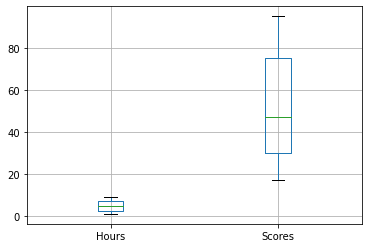

In [48]:
df.plot(kind='box')
plt.grid()
plt.show()

** No Outliers found in the data **

#### 2.3 Checking Null Values

In [29]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

** No Null values found **

#### 2.4 Checking Distribution and Skewness of the data.

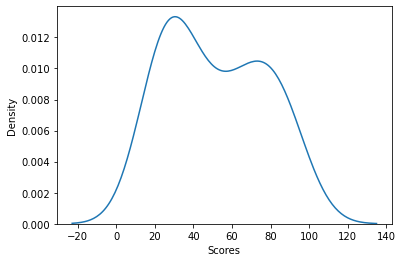

In [30]:
sns.kdeplot(df['Scores'])
plt.show()

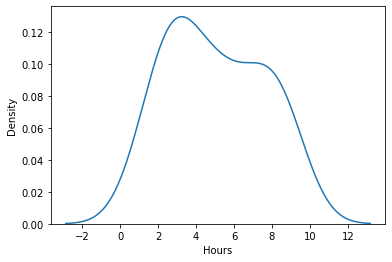

In [31]:
sns.kdeplot(df['Hours'])
plt.show()

In [32]:
print('Skewness: \n',df.skew())

Skewness: 
 Hours     0.190338
Scores    0.233965
dtype: float64


** Skewness is under tolerence **

#### 2.5. Checking Relationship between dependent and independent variables

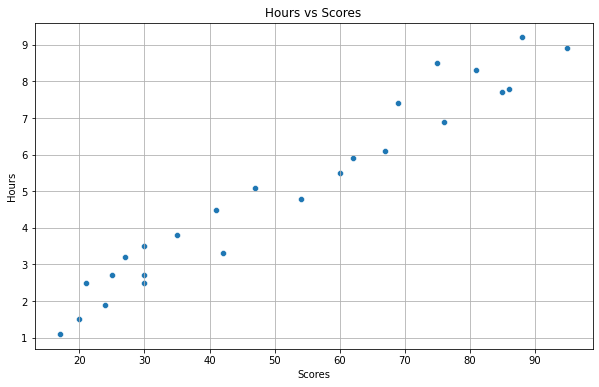

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Scores'],y=df['Hours'])
plt.title('Hours vs Scores')
plt.grid()
plt.show()

#### We can see in the above graph that Scores of a student have linear relationship with no. of Hours

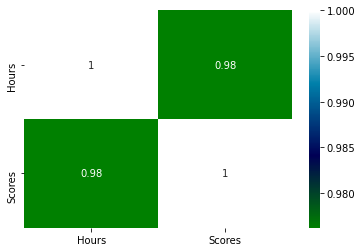

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='ocean')
plt.show()

** We can infer from the heatmap that both variables has a very strong positive correlation **

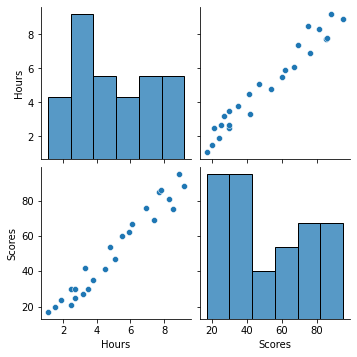

In [35]:
sns.pairplot(df)
plt.show()

### 3. Preparing Dataset

In [36]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [37]:
X.shape,y.shape

((25, 1), (25,))

#### 3.1 Splitting Data into Train and Test set


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
## Checking shape of train and test dataset

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

### 4. Model Building

#### 4.1 Creating model

In [40]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### 4.2 Coefficient and Intercept

In [41]:
print('Intercept: ',lr.intercept_)
print('Coefficient: ',lr.coef_)

Intercept:  2.018160041434683
Coefficient:  [9.91065648]


#### 4.3 Model Accuracy

In [42]:
print('Accuracy: ',lr.score(X_test,y_test))

Accuracy:  0.9454906892105356


** Accuracy for the model is 94.54% **

** Model explains 94.54% of variation in Dependent variable **

#### 4.4 Visualsing Best Fit Line

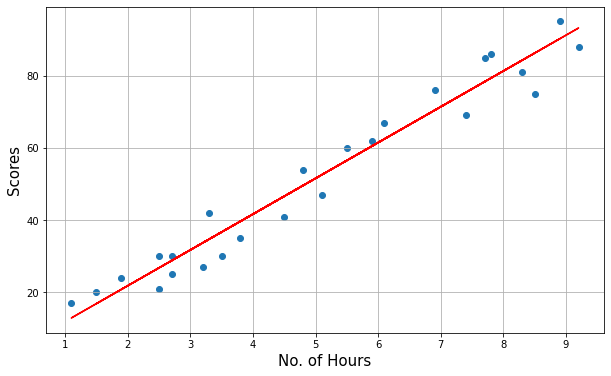

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)

## line of best fit--> y=mx+c

bl=(lr.coef_*X)+(lr.intercept_)

plt.plot(X,bl,'r')
plt.xlabel('No. of Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.grid()
plt.show()

#### 4.5 Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
y_pred=lr.predict(X_test)

In [46]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('R-squared: ',r2_score(y_test,y_pred))

MSE:  21.5987693072174
RMSE:  4.6474476121003665
MAE:  4.183859899002975
R-squared:  0.9454906892105356


### 5. What will be predicted score if a student studies for 9.25 hrs/ day?

In [47]:
pred_score=lr.predict([[9.25]])
print('Predicted Scores for Student studying 9.25hrs/day is : ',pred_score)

Predicted Scores for Student studying 9.25hrs/day is :  [93.69173249]
